<a href="https://colab.research.google.com/github/Siu0901/AI_study/blob/main/%EB%AC%B8%EC%9E%90_%EB%8B%A8%EC%9C%84_RNN(%EB%8B%A4_%EB%8C%80_%EC%9D%BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
# 임의의 엉터리 노래 가사
raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

In [3]:
tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [4]:
# 중복 제거한 문자 집합 만들기
char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print(char_vocab)
print(vocab_size)

[' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
33


In [5]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [6]:
# 예는 studet 를 예측하려하면
# stude -> n
# tuden -> t
# 이런식으로 예측함

In [7]:
# 입력 시퀀스의 길이가 10이 되도록 데이터 구상하기
# 예측 대상인 문자도 필요하니 길이가 11이 되도록 하기
length = 11
sequences = []
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i]
    sequences.append(seq)
print(len(sequences))

426


In [8]:
sequences[:10]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

In [9]:
# 전체 데이터에 대해서 정수 인코딩 수행하기
encoded_sequences = []
for sequence in sequences:
  encoded_sequence = [char_to_index[i] for i in sequence]
  encoded_sequences.append(encoded_sequence)

In [10]:
encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

In [11]:
encoded_sequences = np.array(encoded_sequences)

# 맨 마지막 위치의 문자를 분리
X_data = encoded_sequences[:,:-1]

# 맨 마지막 위치의 문자를 저장
y_data = encoded_sequences[:,-1]

In [12]:
print(X_data[:5])
print(y_data[:5])

[[ 8  0 16 14 28  0 24 23  0 31]
 [ 0 16 14 28  0 24 23  0 31 18]
 [16 14 28  0 24 23  0 31 18 28]
 [14 28  0 24 23  0 31 18 28 17]
 [28  0 24 23  0 31 18 28 17  0]]
[18 28 17  0 21]


In [13]:
# 원-핫 인코딩 수행하기
X_data_one_hot = [to_categorical(i, num_classes=vocab_size) for i in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

In [14]:
print(X_data_one_hot.shape)
print(y_data_one_hot.shape)

(426, 10, 33)
(426, 33)


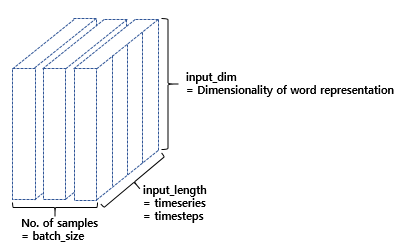

In [15]:
# 모델 설계하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1],X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
14/14 - 4s - 275ms/step - accuracy: 0.1221 - loss: 3.4592
Epoch 2/100
14/14 - 0s - 26ms/step - accuracy: 0.1972 - loss: 3.3333
Epoch 3/100
14/14 - 0s - 12ms/step - accuracy: 0.1972 - loss: 3.0680
Epoch 4/100
14/14 - 0s - 14ms/step - accuracy: 0.1972 - loss: 2.9790
Epoch 5/100
14/14 - 0s - 14ms/step - accuracy: 0.1972 - loss: 2.9530
Epoch 6/100
14/14 - 0s - 14ms/step - accuracy: 0.1972 - loss: 2.9338
Epoch 7/100
14/14 - 0s - 15ms/step - accuracy: 0.1972 - loss: 2.9220
Epoch 8/100
14/14 - 0s - 13ms/step - accuracy: 0.1972 - loss: 2.9090
Epoch 9/100
14/14 - 0s - 13ms/step - accuracy: 0.1972 - loss: 2.8923
Epoch 10/100
14/14 - 0s - 13ms/step - accuracy: 0.1972 - loss: 2.8736
Epoch 11/100
14/14 - 0s - 25ms/step - accuracy: 0.1972 - loss: 2.8457
Epoch 12/100
14/14 - 0s - 14ms/step - accuracy: 0.1972 - loss: 2.8213
Epoch 13/100
14/14 - 0s - 15ms/step - accuracy: 0.1972 - loss: 2.7848
Epoch 14/100
14/14 - 0s - 18ms/step - accuracy: 0.2019 - loss: 2.7458
Epoch 15/100
14/14 - 0s - 10

In [38]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):
  # 초기 시퀀스
  init_text = seed_text
  sentence = ''

  # 다음 문자 예측은 총 n번만 반복.
  for _ in range(n):
    encoded = [char_to_index[char] for char in seed_text]

    encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre')
    encoded = to_categorical(encoded, num_classes=len(char_to_index))
    # 입력한 X(현재 시퀀스)에 대해서 y를 에측하고 y(예측한 문자)를 result에 저장
    result = model.predict(encoded, verbose=0)
    print(result)
    result = np.argmax(result, axis=1)
    print(result)
    for char, index in char_to_index.items():
      if index == result:
        break

    # 현재 시퀀스 + 예측 문자를 현재 시퀀스로 변경
    seed_text = seed_text + char

    # 예측 문자를 문장에 저장
    sentence = sentence + char

  sentence = init_text + sentence
  return sentence

In [39]:
print(sentence_generation(model, char_to_index, 10, 'I like to u', 80))

[[3.7414860e-02 1.4709597e-04 1.0356040e-04 1.6895101e-05 1.2387773e-04
  7.4111718e-05 3.6397454e-05 1.3659261e-04 7.9420389e-04 2.8156261e-05
  1.7323722e-01 6.5309964e-03 4.0968750e-02 7.9944194e-04 6.3807615e-03
  7.0213019e-03 2.2640077e-02 2.6695058e-02 5.3140367e-03 9.2643406e-04
  7.6327710e-03 3.7526930e-04 1.8176396e-03 2.3231171e-02 6.0005113e-02
  1.9299660e-03 1.6184319e-02 4.9260506e-01 1.6641462e-02 4.7852442e-02
  4.4406895e-04 7.1879715e-04 1.1721035e-03]]
[27]
[[2.95033660e-02 5.08422927e-05 3.59456433e-04 1.70012889e-03
  3.63706422e-05 1.70867788e-05 1.56841070e-05 2.78156876e-05
  1.52307752e-04 8.20478635e-06 5.03329141e-03 1.43645715e-03
  3.02216318e-03 1.96096697e-03 5.00545382e-01 3.07074911e-03
  5.08766808e-03 1.17784867e-03 2.93917488e-02 2.79591168e-05
  1.15456181e-02 1.87873840e-04 1.04009565e-02 3.01734060e-01
  8.66701175e-03 2.07502022e-03 1.45843336e-02 5.25604002e-02
  1.30755026e-02 1.20257486e-04 2.58763437e-04 1.08472910e-03
  1.07992941e-03]]
[1

In [43]:
# 학습 데이터 안에 있는 문장들은 예가 그럭저럭 괜찮게 만듦
# 그 외의 문장은 기대하지 말자